In [1]:
import sys
import torch
from cgan import Generator
sys.path.append("/data/bitt/wzq/wzq/GANs/")
from utils import make_image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Generator().to(device)
model.eval()  # eval一定要加

Generator(
  (embedding): Embedding(10, 100)
  (fc1): Linear(in_features=100, out_features=12544, bias=True)
  (conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
)

In [3]:
model.load_state_dict(torch.load("/data/bitt/wzq/wzq/GANs/CGAN/checkpoints/generator_best.pt"))

In [4]:
z = torch.randn(100, 100).to(device)
label = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).repeat(10).to(device)

In [5]:
output = model(z, label)
output = (output + 1.0) / 2.0

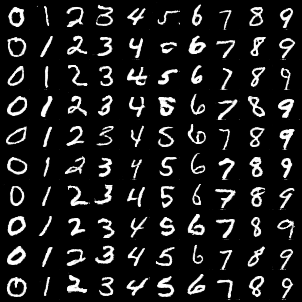

In [6]:
make_image(output, nrow=10)